In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 3. Norm and Distance

### 3.1 Norm

In [4]:
x = np.array([2,-1,2])
np.linalg.norm(x)

3.0

In [7]:
np.sqrt(np.inner(x,x))

3.0

RMS value

In [8]:
rms = lambda x: np.linalg.norm(x)/np.sqrt(len(x))

In [12]:
t = np.arange(0, 1.01, 0.01)
x = np.cos(8*t) - 2*np.sin(11*t)
sum(x)/len(x)

-0.042529437832386836

In [13]:
rms(x)

1.0837556422598

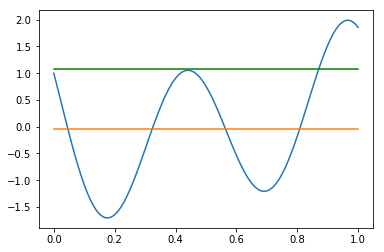

In [16]:
plt.plot(t,x)
plt.plot(t, np.mean(x)*np.ones(len(x)))
plt.plot(t, rms(x)*np.ones(len(x)), 'g')

#### Chebyshev's inequality 

Chebyshev's inequality (also called the Bienaymé–Chebyshev inequality) guarantees that, for a wide class of probability distributions, no more than a certain fraction of values can be more than a certain distance from the mean

In [26]:
cheb = lambda x,a: math.floor(np.linalg.norm(x)**2/a)

In [27]:
a = 1.5
cheb(x,a)

79

### 3.2 Distance

#### the distance of two vectors

In [28]:
u = np.array([1.8, 2.0, -3.7, 4.7])
v = np.array([0.6, 2.1, 1.9, -1.4])

In [30]:
dist = np.linalg.norm(u-v)
dist

8.367795408588812

#### Nearest neighbor

In [31]:
near_neigh = lambda x, z: z[np.argmin([np.linalg.norm(x-y) for y in z])]

In [32]:
z = ([2,1], [7,2], [5.5,4], [4,8], [1,5], [9,6])
x = np.array([5,6])
near_neigh(x,z)

[5.5, 4]

In [33]:
np.argmin([6,8,1,4,2])

2

### 3.3 Standard Deviation

In [39]:
stdev = lambda x: np.linalg.norm(x - np.mean(x))/np.sqrt(len(x))

In [40]:
x = np.random.randn(100)

In [43]:
stdev(x)

0.9735361596295004

In [42]:
np.std(x)

0.9735361596295006

standardize a vector

In [50]:
def standardize(x):
    de_mean = x - np.mean(x)
    return de_mean/ np.std(de_mean)

In [51]:
x = np.random.random(100)
np.mean(x), np.std(x)

(0.4761572325739526, 0.28900417170894915)

In [53]:
z = standardize(x)
np.mean(z), np.std(z)

(-1.071365218763276e-16, 1.0)

In [58]:
np.linalg.norm(z)/len(z)**0.5

1.0

### 3.4 Angle

#### Angle between two vectors

In [59]:
ang = lambda x,y: np.arccos(x@y / (np.linalg.norm(x)*np.linalg.norm(y)))

In [60]:
a = np.array([1,2,-1])
b = np.array([2,0,-3])
ang(a,b)

0.9689825515916383

In [61]:
a@b/ (np.linalg.norm(a)*np.linalg.norm(b))

0.5661385170722979

#### Coefficient between two vectors 
calculated on the de-meaned vectors

In [74]:
def corr_coef (x,y):
    x_tilde = x - np.mean(x)
    y_tilde = y - np.mean(y)
    return (x_tilde@y_tilde) / (np.linalg.norm(x_tilde) * np.linalg.norm(y_tilde))

In [75]:
a = np.array([4.4, 9.4, 15.4, 12.4, 10.4, 1.4, -4.6, -5.6, -0.6, 7.4])
b = np.array([6.2, 11.2, 14.2, 14.2, 8.2, 2.2, -3.8, -4.8, -1.8, 4.2])
corr_coef(a,b)

0.9678196342570433

In [64]:
a = np.array([4.1, 10.1, 15.1, 13.1, 7.1, 2.1, -2.9, -5.9, 0.1, 7.1])
b = np.array([5.5, -0.5, -4.5, -3.5, 1.5, 7.5, 13.5, 14.5, 11.5, 4.5])
corr_coef(a,b)

-0.6170340380866697